In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")    

In [4]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
features = ['danceability','energy','valence','acousticness','tempo']
x =df[features]
x.head()

,danceability,energy,valence,acousticness,tempo
0,0.676,0.4610,0.715,0.0322,87.917
1,0.420,0.1660,0.267,0.9240,77.489
2,0.438,0.3590,0.120,0.2100,76.332
3,0.266,0.0596,0.143,0.9050,181.740
4,0.618,0.4430,0.167,0.4690,119.949


In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(x_scaled)
df['cluster'] = labels

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

df['pc1'] = x_pca[:, 0]
df['pc2'] = x_pca[:, 1]

df[['pc1', 'pc2', 'cluster']].head()

,pc1,pc2,cluster
0,-0.305532,-1.259629,1
1,3.144772,-0.590126,2
2,1.660141,0.487281,2
3,2.908638,1.408710,2
4,1.102750,0.107866,2


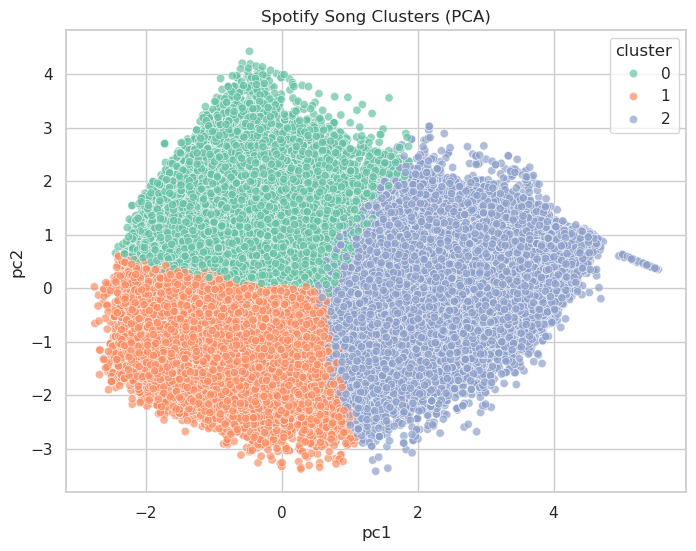

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='cluster', palette='Set2', alpha=0.7)
plt.title("Spotify Song Clusters (PCA)")
plt.show()

In [12]:
cluster_summary = df.groupby('cluster')[features].mean()
cluster_summary

,danceability,energy,valence,acousticness,tempo
cluster,,,,,
0,0.477009,0.803819,0.327503,0.075914,136.262633
1,0.694298,0.708445,0.682227,0.233200,118.810882
2,0.471597,0.321261,0.318594,0.757866,109.486695
